In [ ]:
!pip install seaborn

     -------------------------------------- 292.8/292.8 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 38.6/38.6 MB 1.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd 
import numpy as np 
from numpy import random
import matplotlib.pyplot as plt 
import seaborn as sns

import tensorflow as tf 
tf.__version__

'2.9.1'

In [24]:
data=pd.read_csv('PS_20174392719_1491204439457_log.csv')
data.isnull()
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [25]:
len(data)

6362620

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
data.step.max()

743

In [26]:
data.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum().any()

False

In [7]:
data.isFraud.value_counts()/len(data)*100

0    99.870918
1     0.129082
Name: isFraud, dtype: float64

c:\Users\houss\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFraud', ylabel='count'>

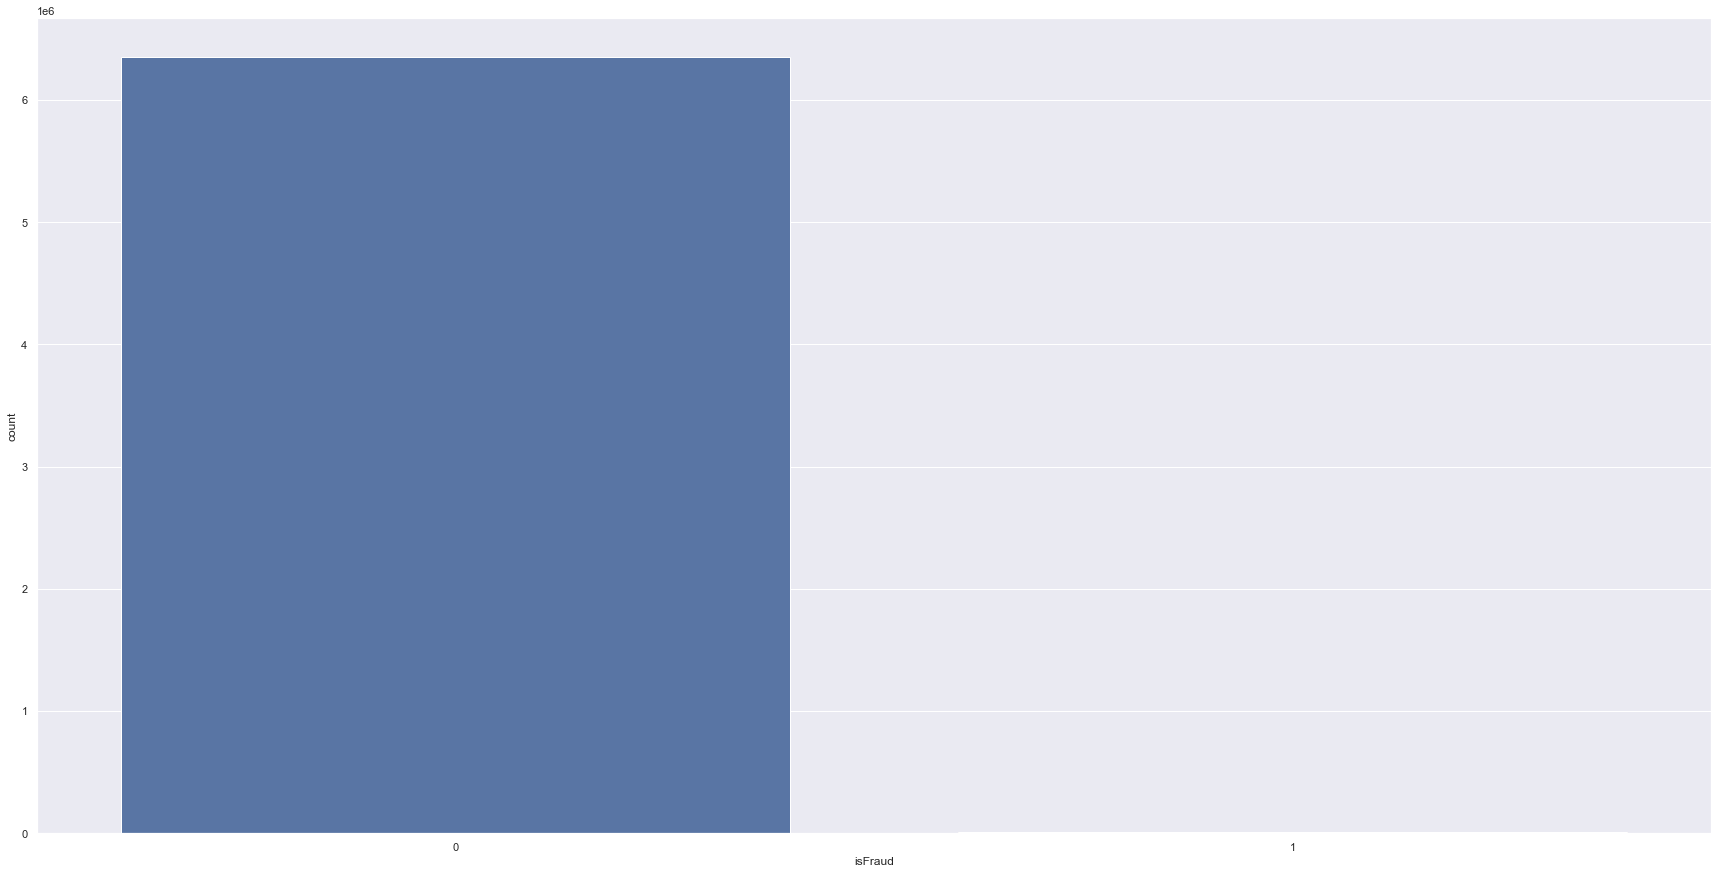

In [27]:
sns.set(rc={'figure.figsize':(30,15)})
sns.countplot(data.isFraud)


In [9]:
data.amount.min(),data.amount.max()

(0.0, 92445516.64)

#analyse exploration des données

In [10]:
data.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [11]:
data[data.isFlaggedFraud==1].amount.min(),data[data.isFlaggedFraud==1].amount.max()

(353874.22, 10000000.0)

In [13]:
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

c:\Users\houss\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

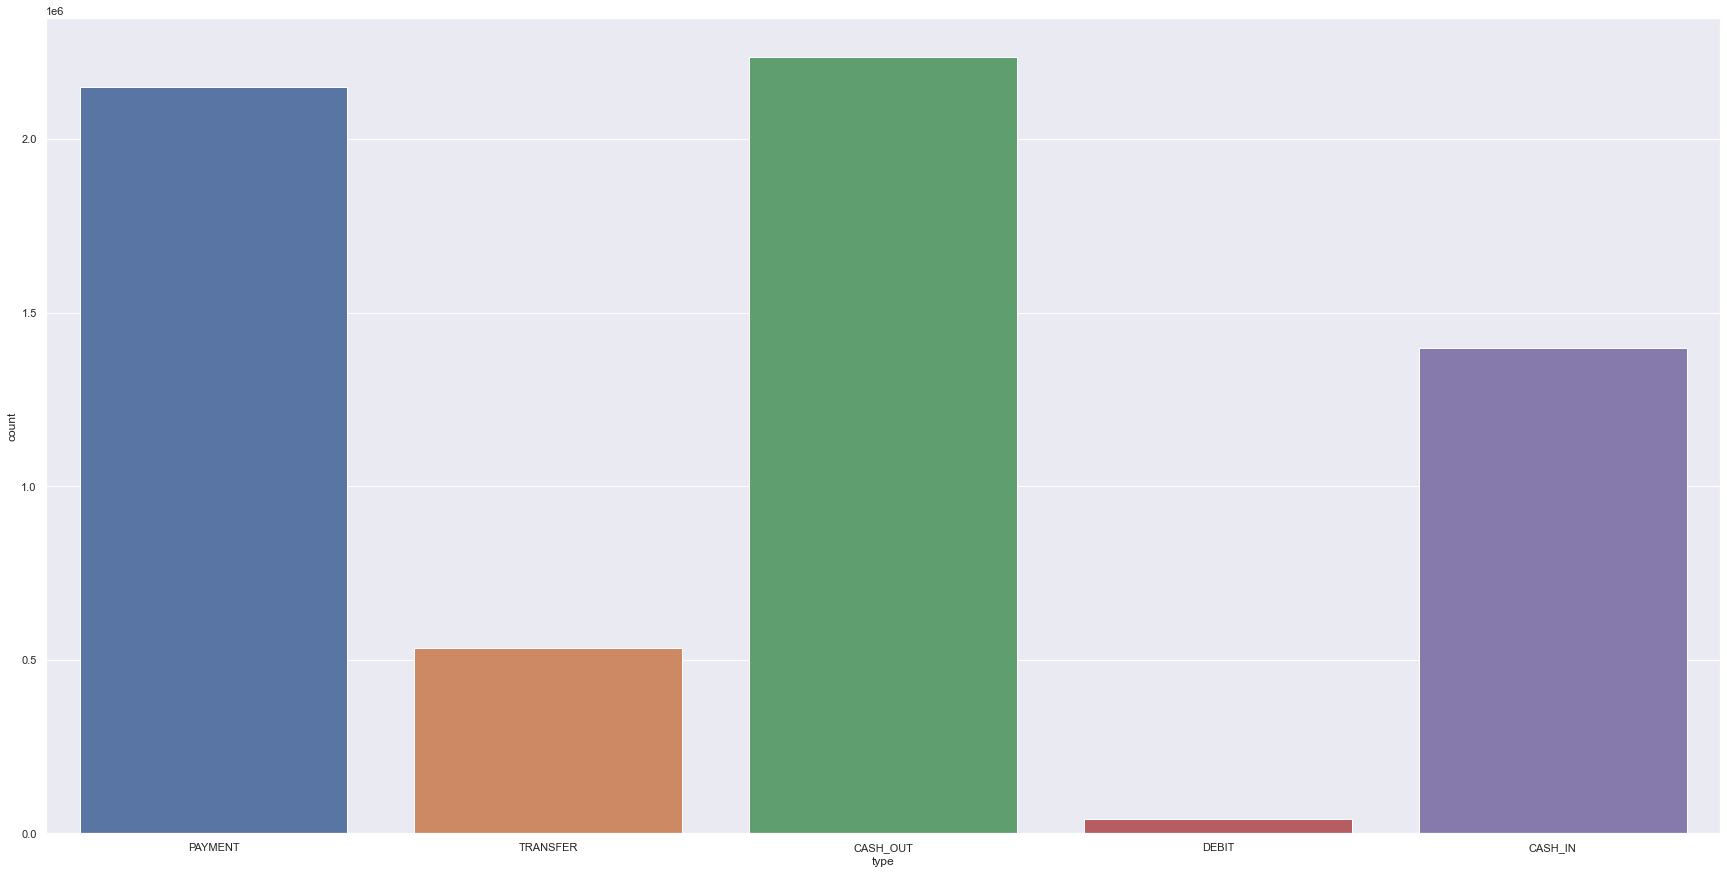

In [28]:
sns.countplot(data.type)

In [16]:
data.groupby(['type','isFraud']).size()

type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
dtype: int64

<AxesSubplot:>

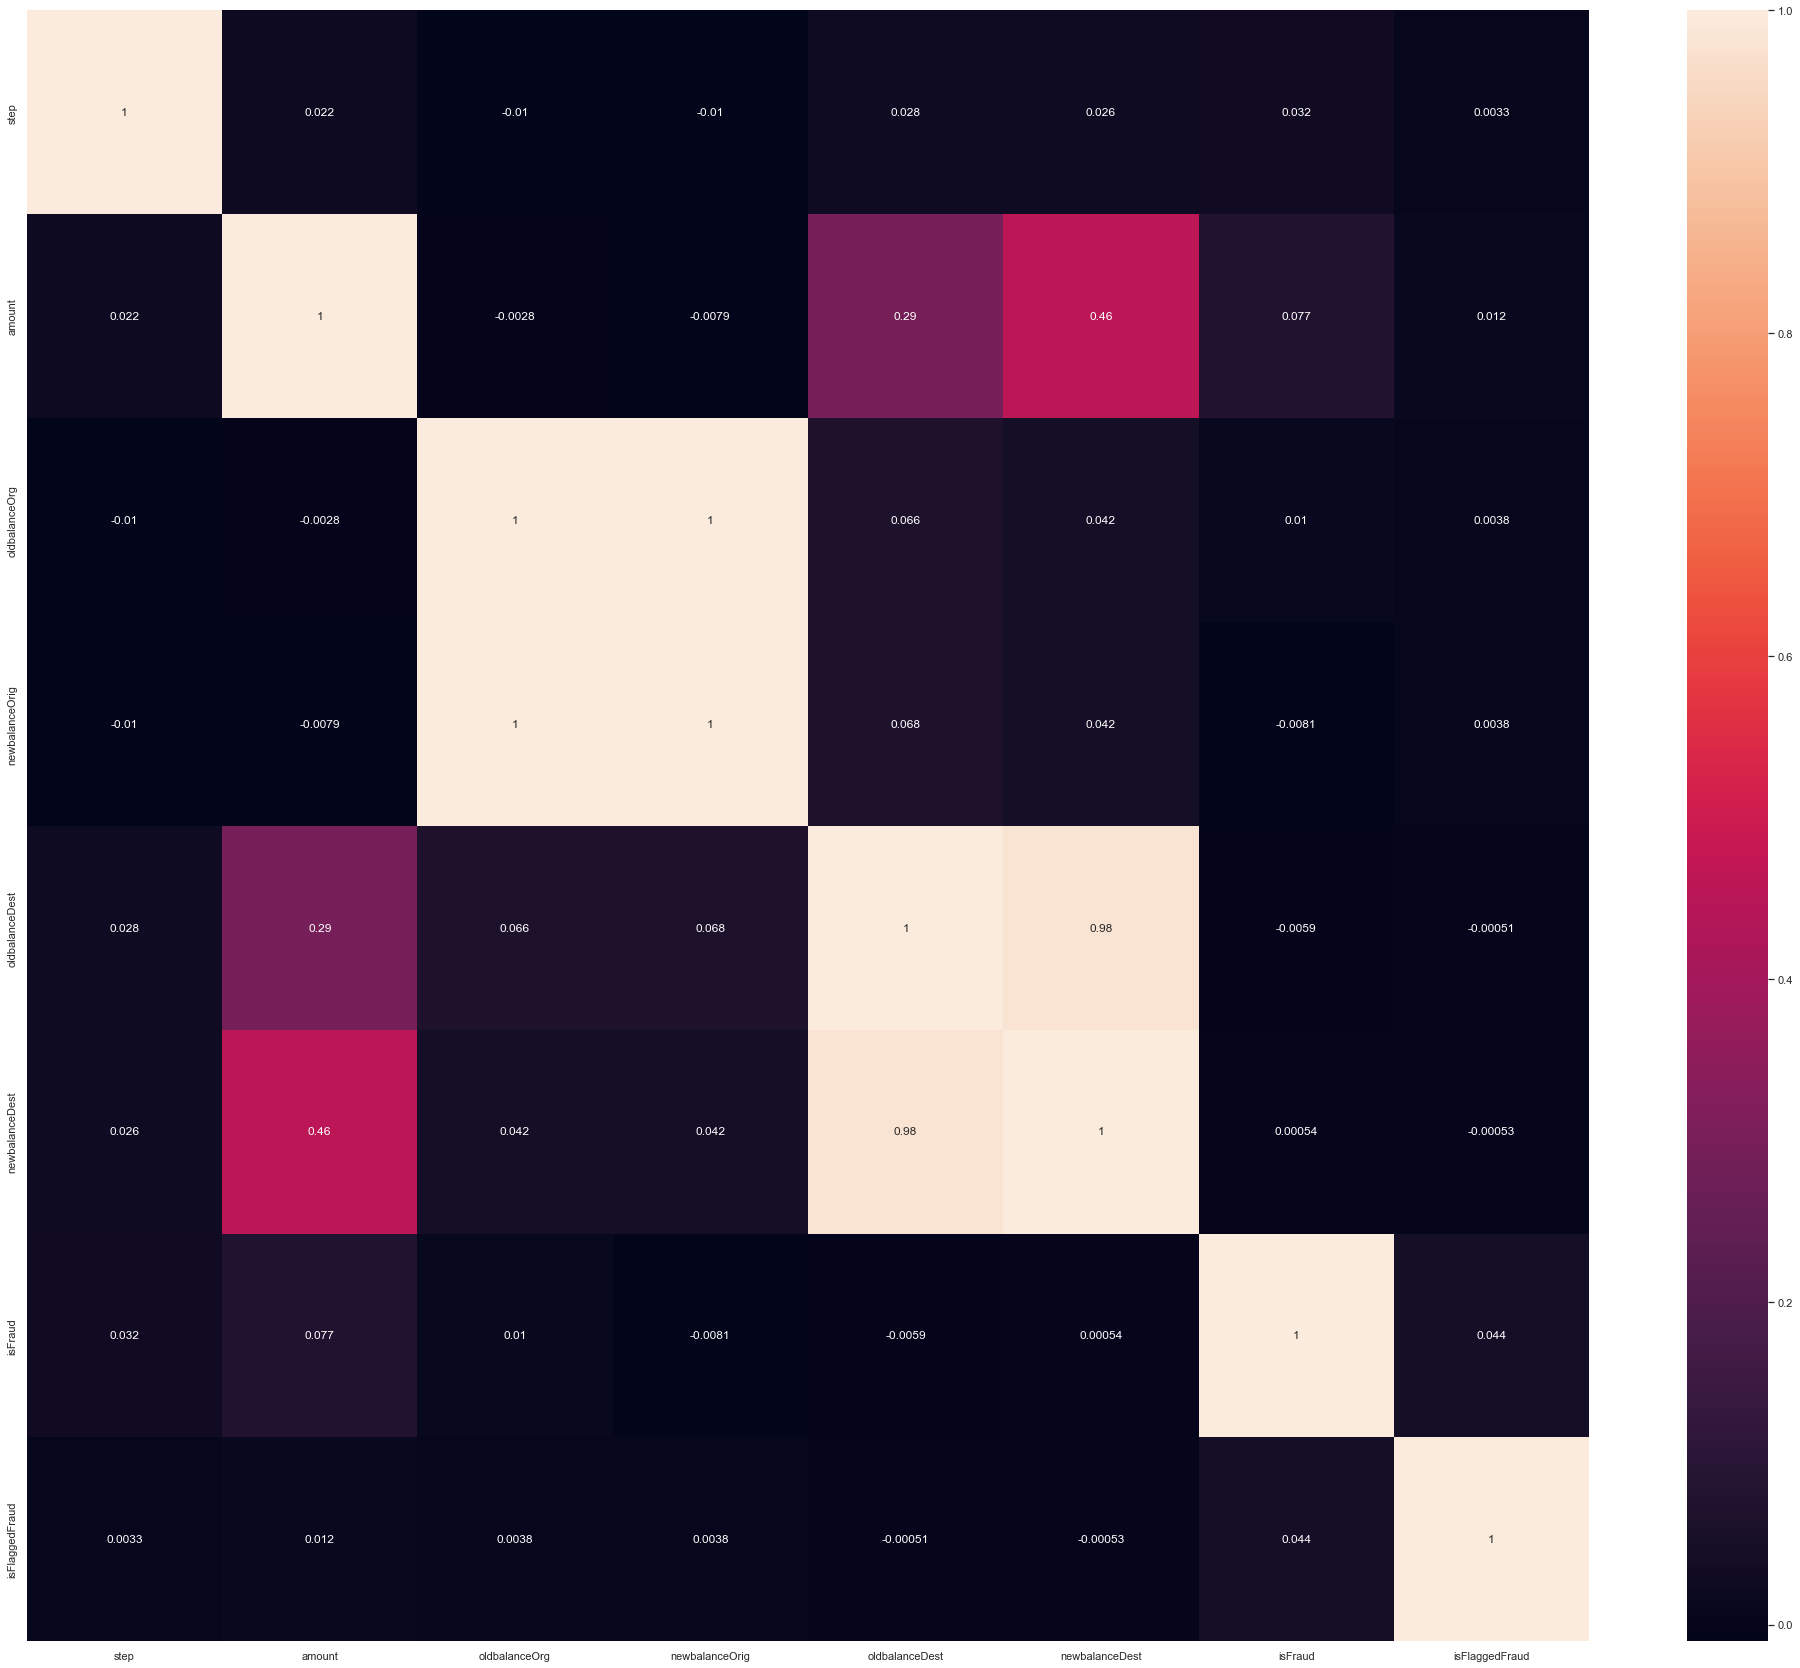

In [42]:
cor=data.corr()
sns.set(rc = {'figure.figsize':(35,30)})
sns.heatmap(cor,annot=True)

<AxesSubplot:>

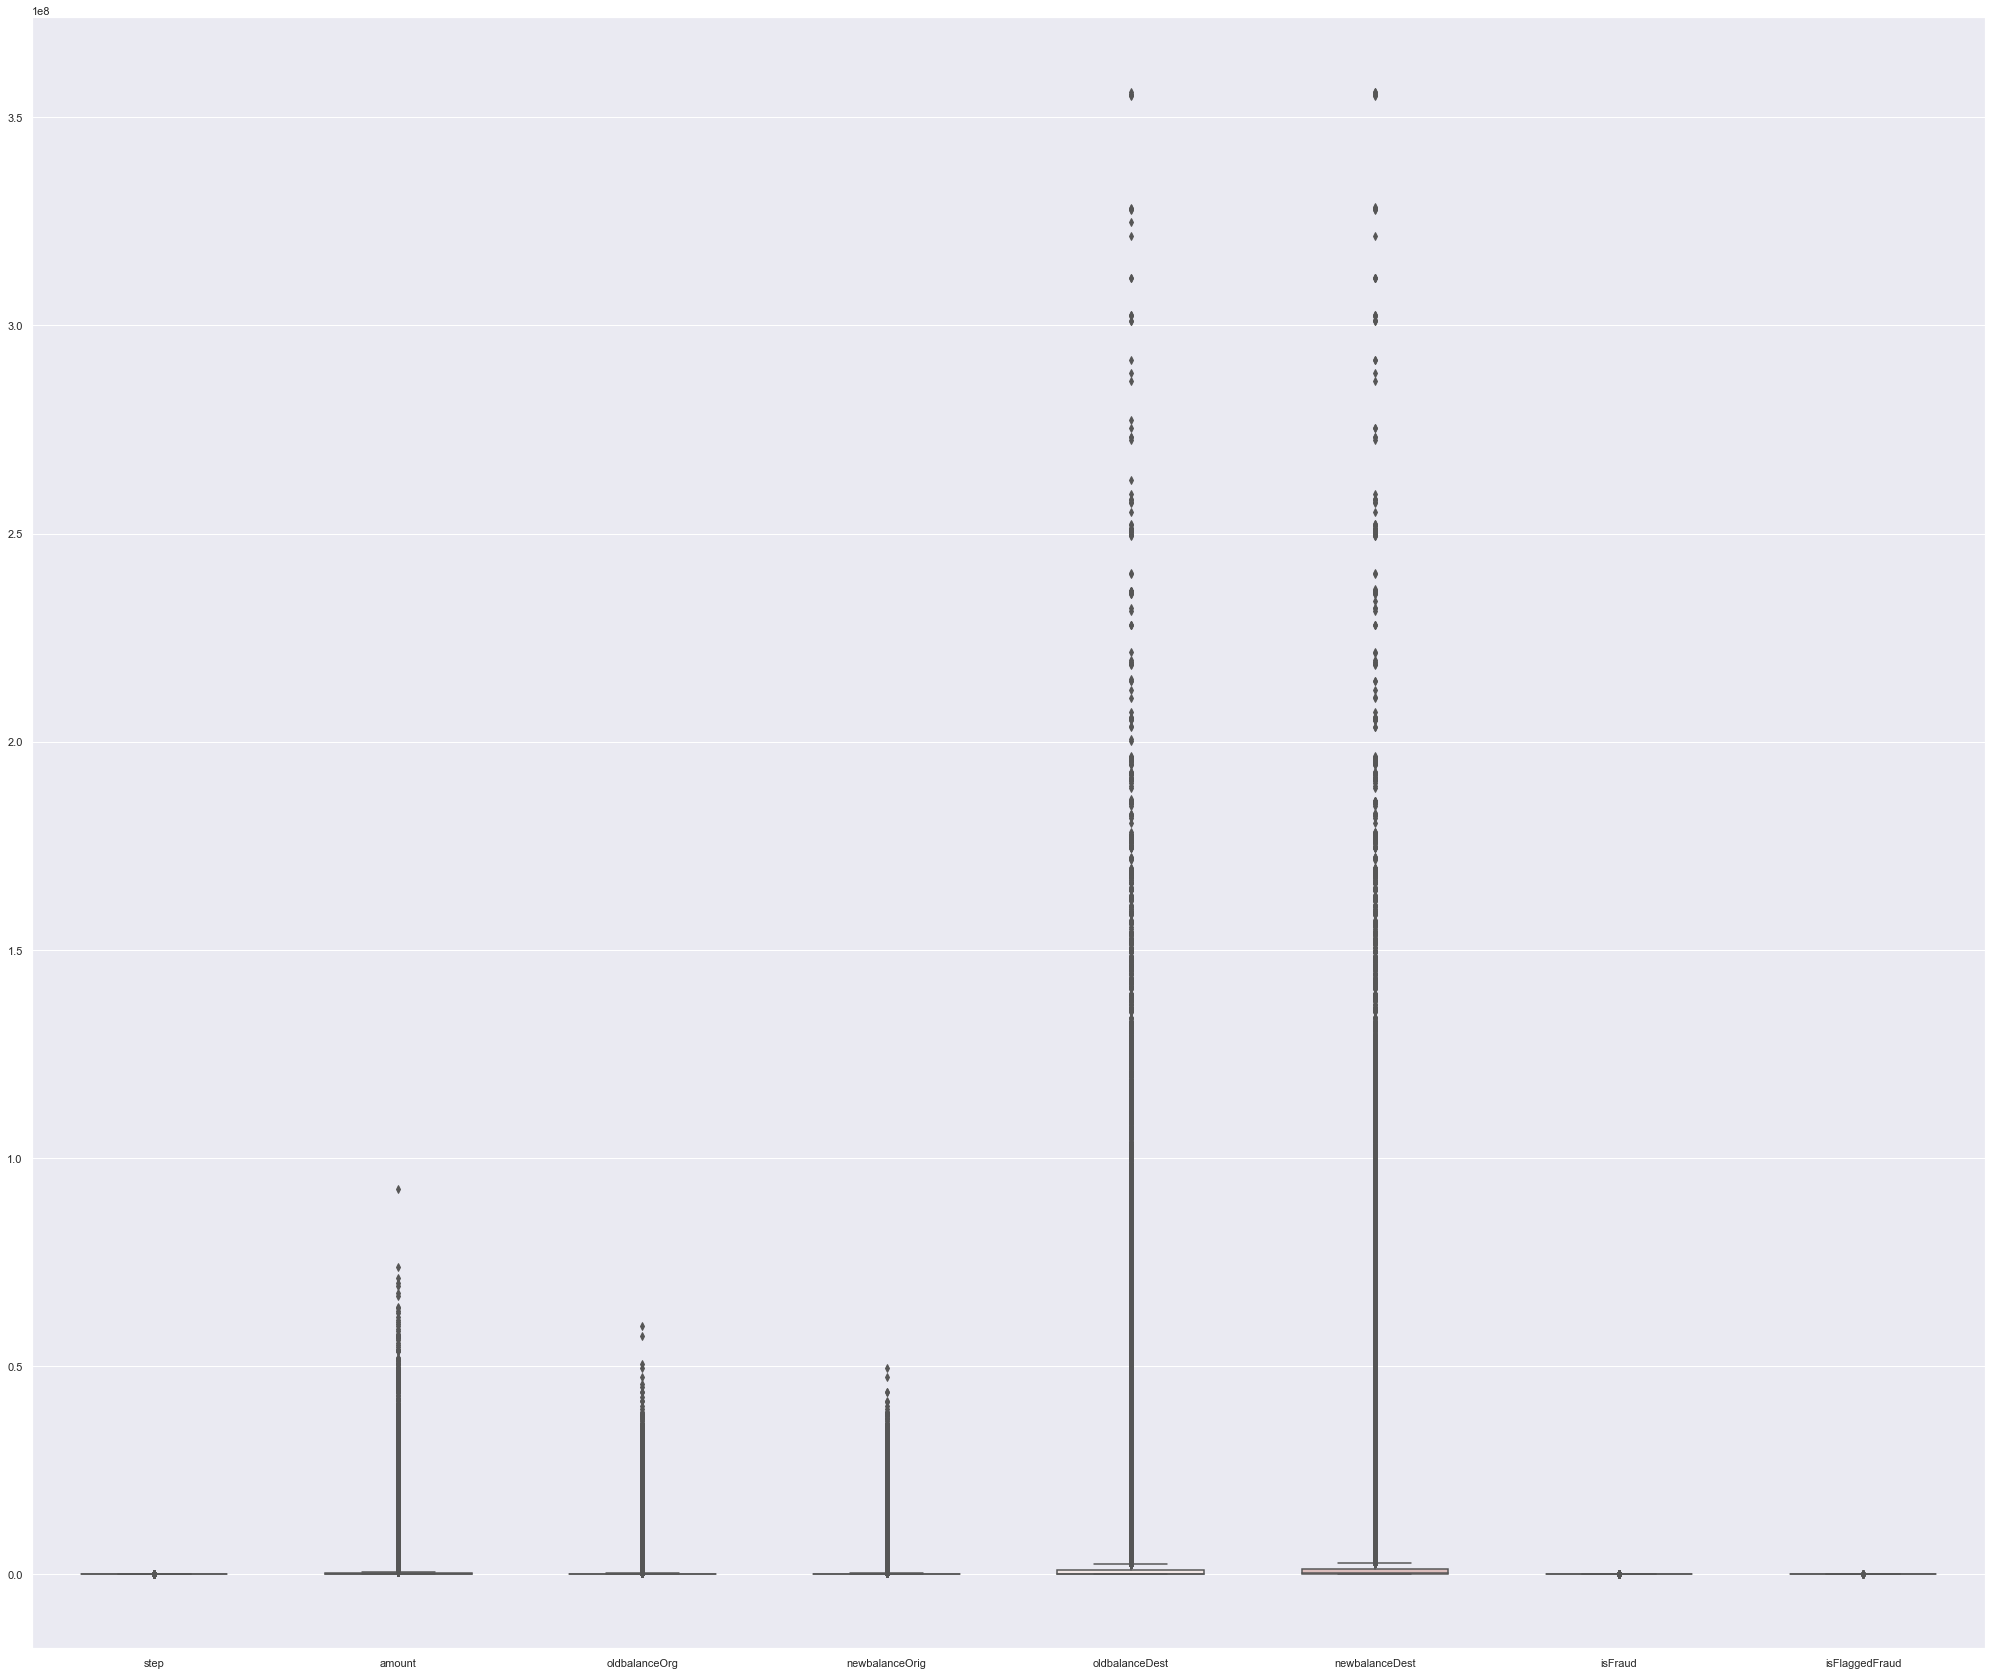

In [17]:
sns.boxplot( data=data,
        width=.6, palette="vlag")

<AxesSubplot:>

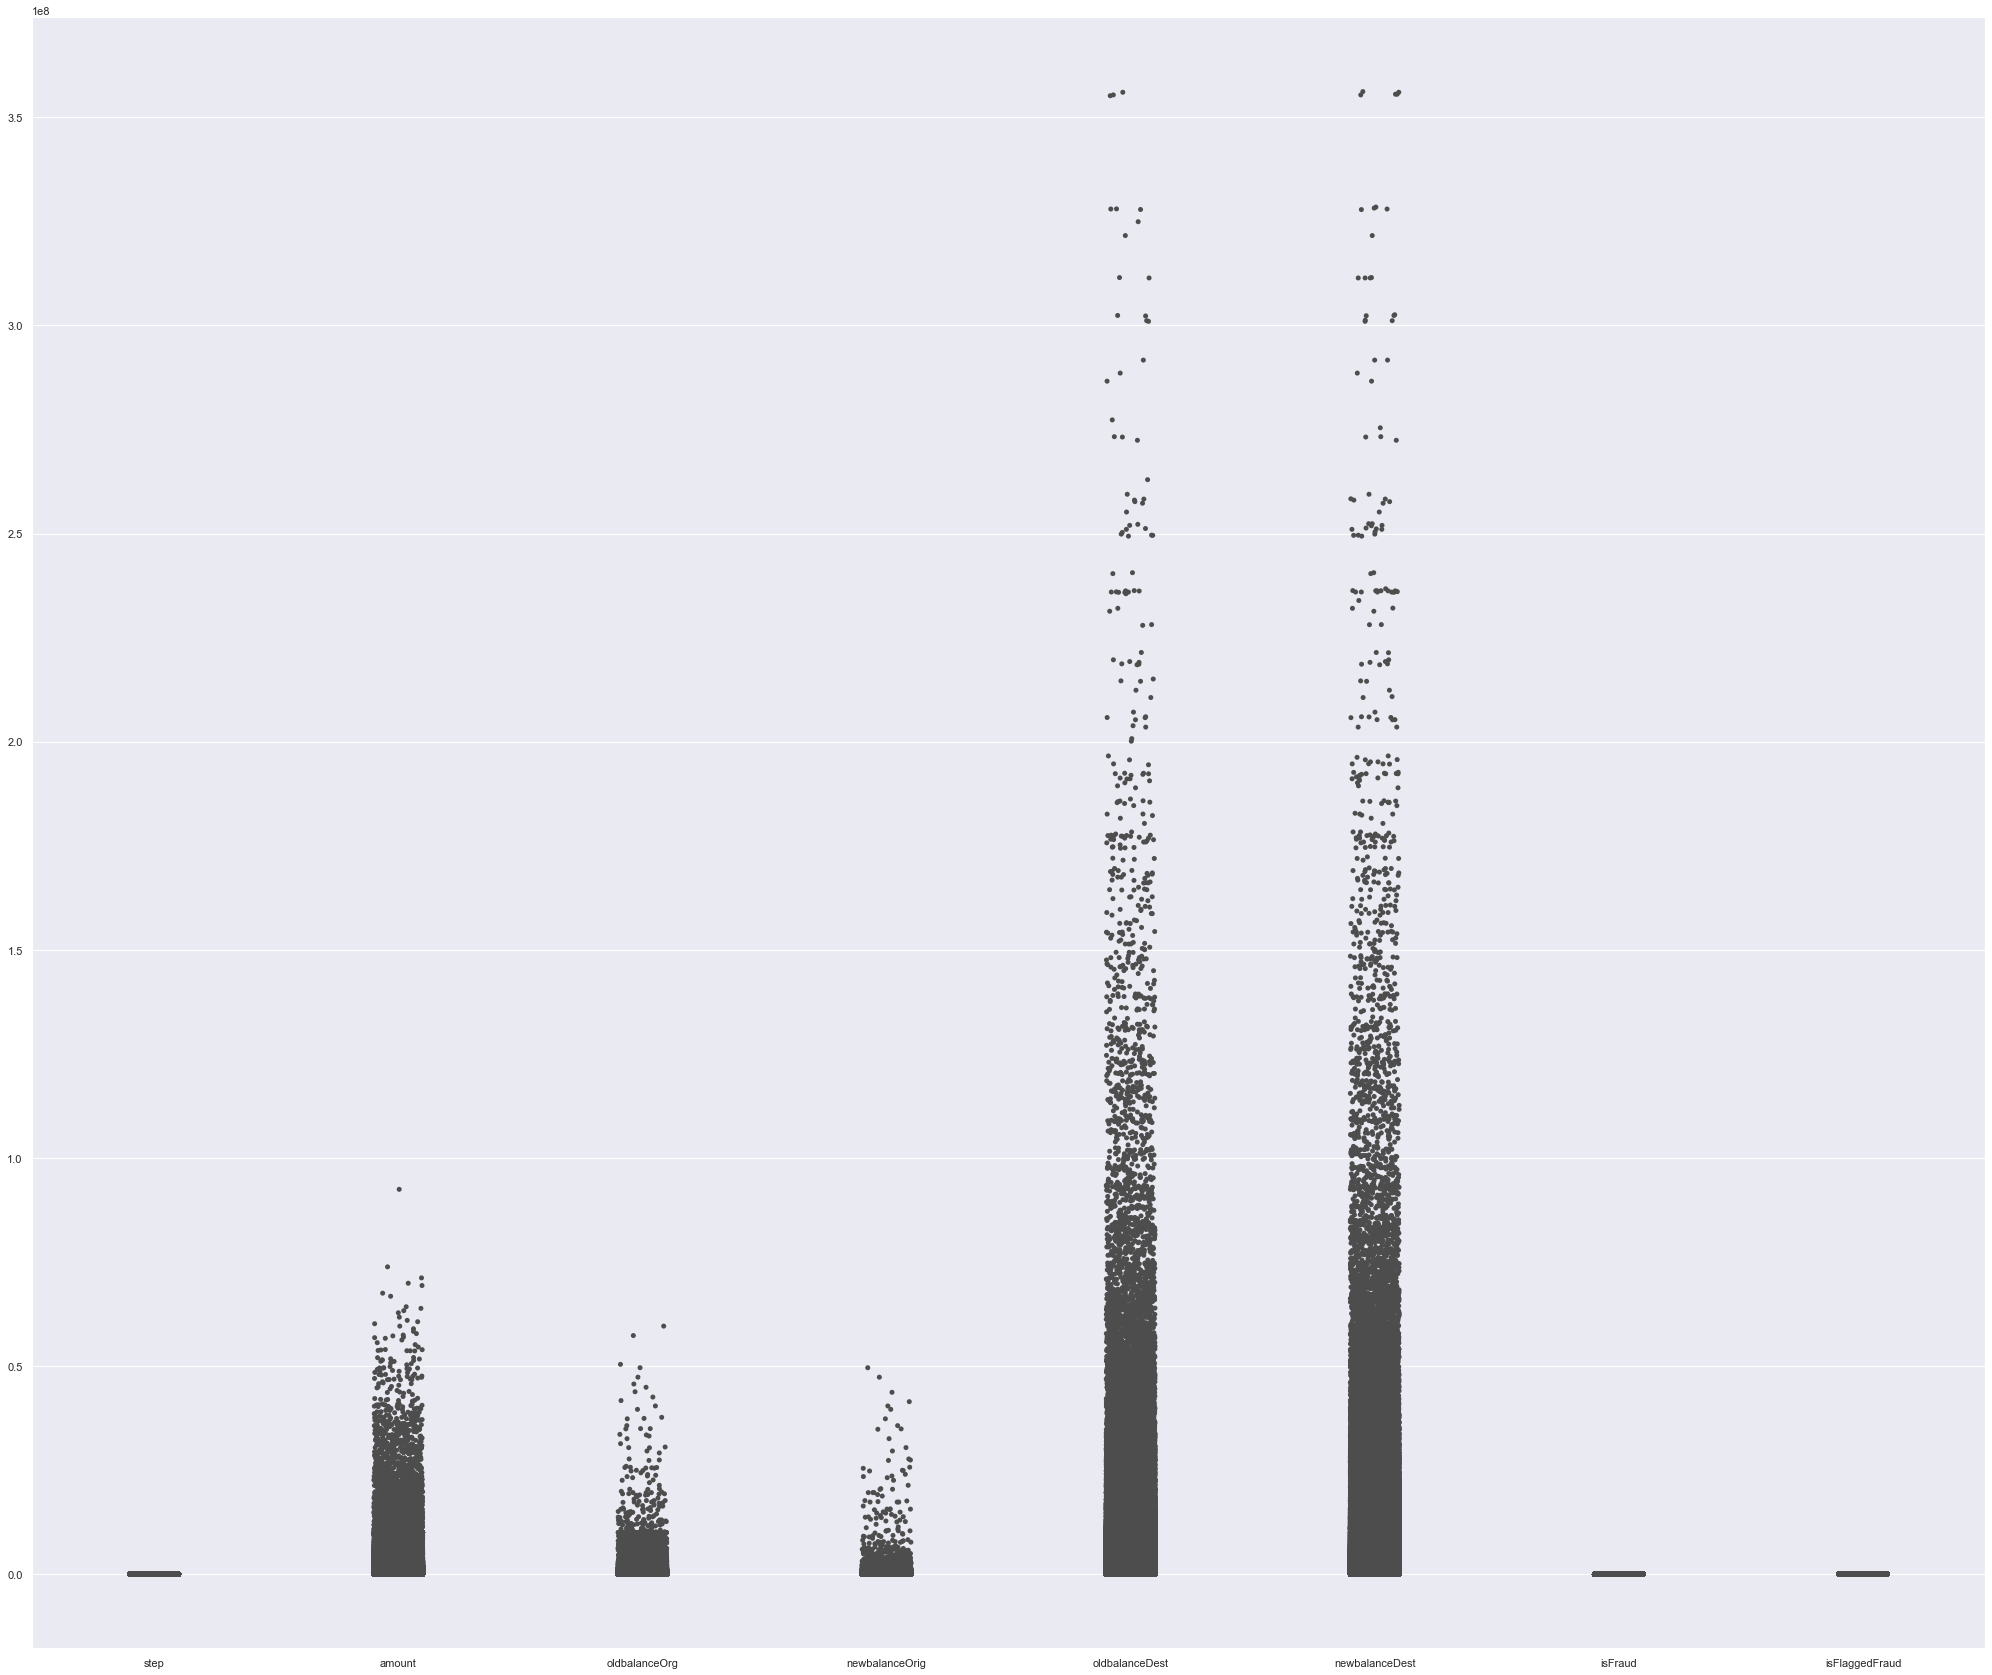

In [18]:
data = data[data.type.isin(['CASH_OUT','TRANSFER'])].reset_index(drop=True)



In [ ]:

sns.stripplot( data=data,
              color=".3", linewidth=0)

In [17]:

data = data[data.type.isin(['CASH_OUT','TRANSFER'])].reset_index(drop=True)
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
1,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
2,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
3,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
4,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2770404,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
2770405,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
2770406,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
2770407,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [18]:
x=data.drop(['type','step','nameDest','nameOrig','isFraud','isFlaggedFraud'],axis=1)
y=data.isFraud
y





0          1
1          1
2          0
3          0
4          0
          ..
2770404    1
2770405    1
2770406    1
2770407    1
2770408    1
Name: isFraud, Length: 2770409, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [19]:
x['type']=x['type'].map({'TRANSFER':0,'CASH_OUT':1})



KeyError: 'type'

In [23]:
x_train,x_test ,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)

import xgboost as xgb


clf=xgb.XGBClassifier(max_depth=6,n_jobs=-1)
clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [62]:
from sklearn.metrics import f1_score,precision_score ,recall_score,confusion_matrix
y_predi=clf.predict(x_test)
y_predi

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
precision_score(y_predi,y_test)

0.8058429701765064

In [64]:
recall_score(y_predi,y_test)

0.9470672389127325

In [65]:
f1_score(y_predi,y_test)

0.8707661953304835

In [66]:
confusion_matrix(y_predi,y_test)

array([[552365,    319],
       [    74,   1324]], dtype=int64)

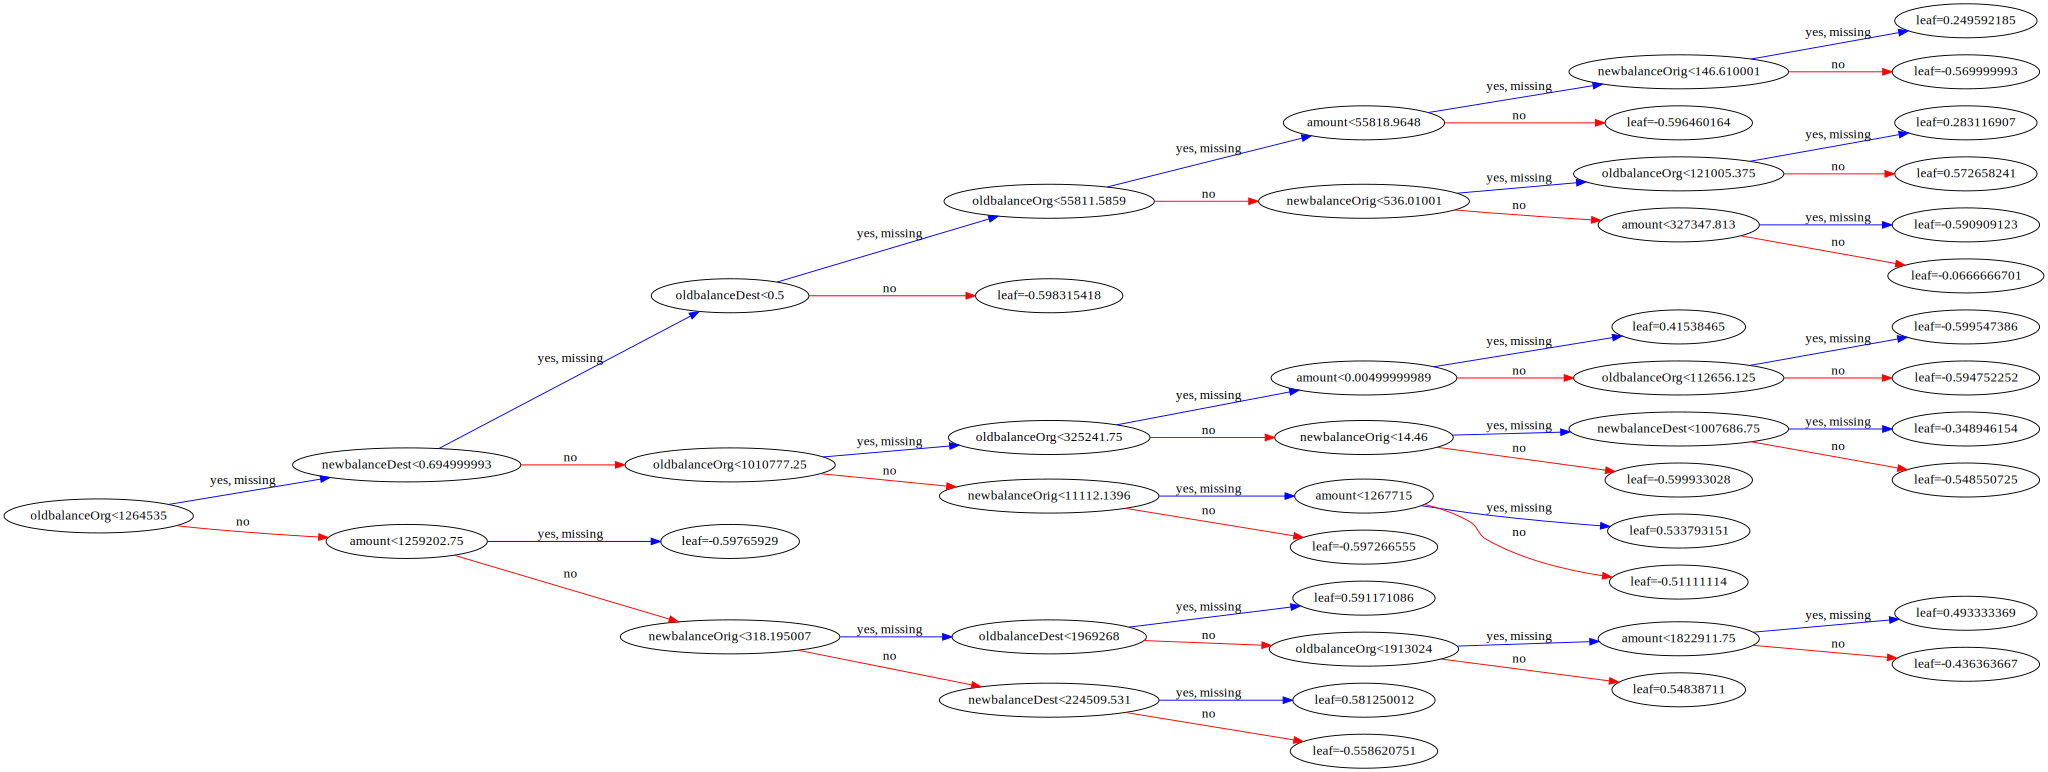

In [29]:
from xgboost import to_graphviz
to_graphviz(clf,rankdir="LR")